In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import List
import numpy as np
import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from gaussian_model import LinearKernel, ConstantKernel
from gaussian_model import ExponentialKernel, PeriodicKernel
from gaussian_model import WhiteNoiseKernel, GaussKernel
from gaussian_model import LogGaussKernel
from gaussian_model import Gaussian_Process_Regression

from sklearn.gaussian_process import kernels
from sklearn.gaussian_process import GaussianProcessRegressor

%matplotlib inline
%matplotlib ipympl

ite:1  Abs Err:43.068489382723  x_new:(np.float64(0.25415708759535777), np.float64(0.10997902226401879), np.float64(0.4796746593784675), np.float64(0.16019915965614479))
ite:101  Abs Err:51.9207987104168  x_new:(np.float64(0.2518800383635927), np.float64(0.10899369602139496), np.float64(0.47537714863434943), np.float64(0.16019915965614479))
ite:201  Abs Err:51.68888631901029  x_new:(np.float64(0.25180488989738053), np.float64(0.10914164291200329), np.float64(0.4753458110924701), np.float64(0.1602032983487367))
ite:301  Abs Err:50.7153574430192  x_new:(np.float64(0.2518509317369908), np.float64(0.10938202793997906), np.float64(0.47556224238505623), np.float64(0.16020143488566368))
ite:401  Abs Err:49.75468106854029  x_new:(np.float64(0.25189879122393166), np.float64(0.10962378996514496), np.float64(0.47578370650464186), np.float64(0.16020023071646092))
ite:501  Abs Err:48.845113572646184  x_new:(np.float64(0.2519470544874853), np.float64(0.10985573404680185), np.float64(0.47600359992367

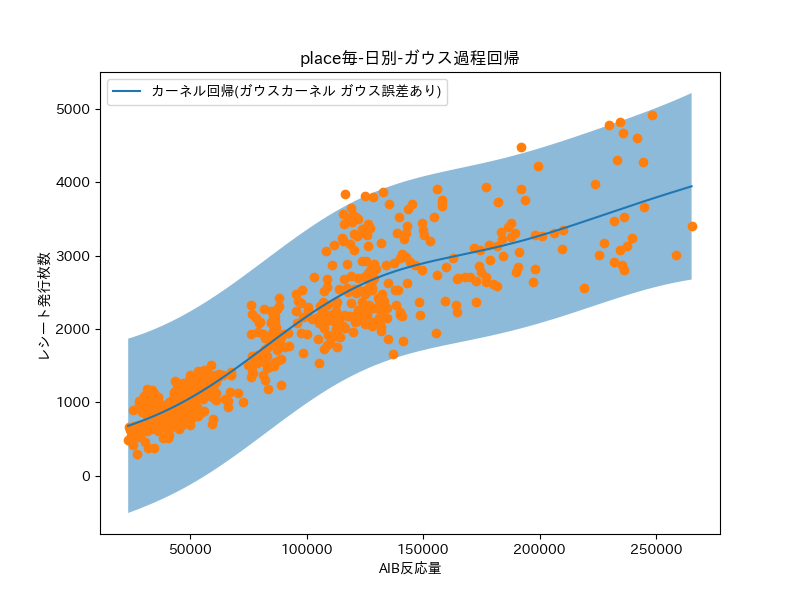

In [3]:
pdf_olympic = pd.read_csv('test_data/ガウス過程回帰_TRAIN_DATA(place毎-日別-ALLBeacon).csv', header=0, index_col=False)
pdf_olympic = pdf_olympic.drop_duplicates(subset=['aib_count', 'レシート枚数'])
train_data  = [[row['aib_count'], row['レシート枚数']] for _, row in pdf_olympic.iterrows()]
train_data  = np.array(train_data)

x_data = np.array(train_data)[:, 0].reshape(-1, 1)
y_data = np.array(train_data)[:, 1].reshape(-1, 1)


kernel = LinearKernel(alpha=1)          \
         + GaussKernel(alpha=1, beta=1) \
         + WhiteNoiseKernel(alpha=1)
model  = Gaussian_Process_Regression(
    		x_data, 
            y_data,
            kernel=kernel, 
            norm_α=10, 
            l1_ratio=0.1, 
            eta=1e-5, 
            tol=1e-6, 
            max_iterate=15000)

thetas = (np.float64(0.2541799617332413),
 np.float64(0.10998892037602254),
 np.float64(0.4797178300978115),
 np.float64(0.16019349933231164))
model.kernel.set_theta(thetas)

# solver = "external library"
# solver = "ISTA"
solver = "OPTIMIZER"
model.fit(solver=solver, useRAdam=False)

x_test    = np.arange(x_data.min(), x_data.max(), 100)
pred_mean, pred_std = model.predict(x_test.reshape((-1, 1)), return_std=True)
pred_mean = pred_mean.reshape(-1)

# データを描画
plt.figure(figsize=(8, 6))
plt.plot(x_test, pred_mean, label='カーネル回帰(ガウスカーネル ガウス誤差あり)')
plt.fill_between(x_test, pred_mean - 3*pred_std, pred_mean + 3*pred_std, alpha=0.5)
plt.scatter(x_data, y_data, marker='o')
plt.title('place毎-日別-ガウス過程回帰')
plt.xlabel('AIB反応量')
plt.ylabel('レシート発行枚数')
plt.legend()
plt.show()

In [4]:
model.kernel.get_theta()

(np.float64(0.25418465522516487),
 np.float64(0.1099884629232724),
 np.float64(0.4797185040305288),
 np.float64(0.16019350035686133))